In [28]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent 

In [29]:
env =  Maze()

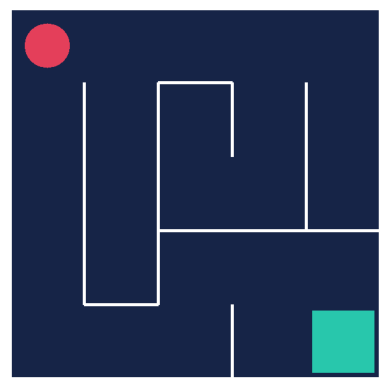

In [30]:
env.reset()
frame = env.render(mode="rgb_array")
plt.axis("off")
plt.imshow(frame)

In [31]:
print(env.observation_space.nvec)
print(env.action_space.n)

[5 5]
4


# Find Policy
# Value Iteration

In [32]:
policy_probs = np.full((5, 5, 4), 0.25)
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [33]:
def policy(state):
    return policy_probs[state]

In [34]:
action_probabilities = policy((0,0))
action_probabilities

array([0.25, 0.25, 0.25, 0.25])

In [35]:
# test_agent(env, policy, episodes=1)

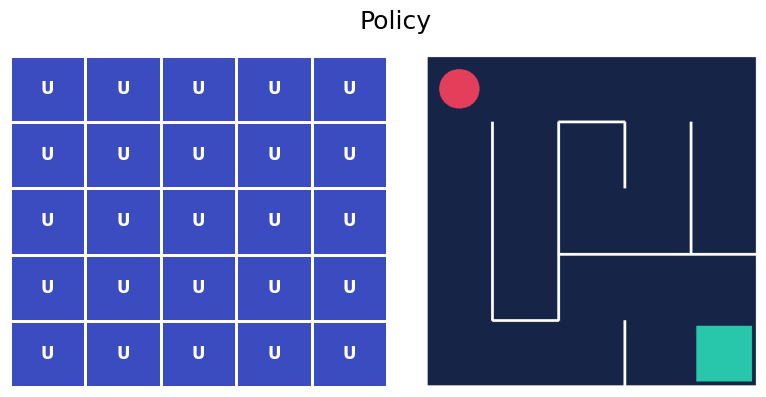

In [36]:
plot_policy(policy_probs, frame)

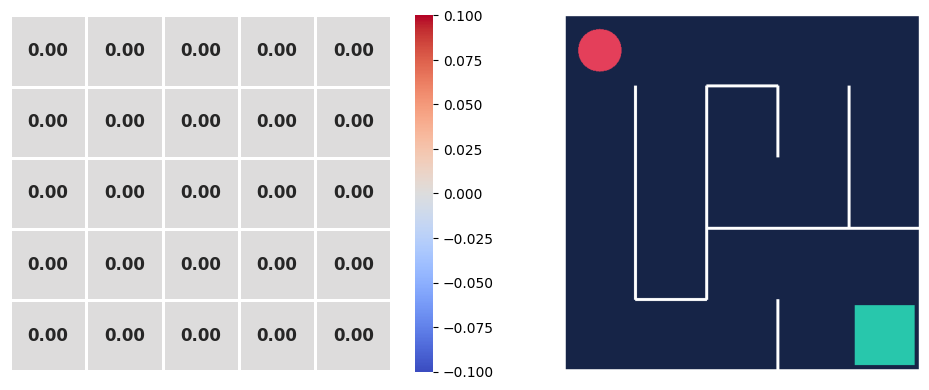

In [37]:
state_values = np.zeros(shape=(5,5))
plot_values(state_values, frame)

In [38]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[row, col]
                action_prob = None
                max_qsa = -float("inf")
                
                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_prob = np.zeros(4)
                        action_prob[action] = 1
                        
                state_values[row, col] = max_qsa
                policy_probs[row, col] = action_prob
                
                delta = max(delta, abs(max_qsa - old_value))

                

In [39]:
policy_probs = np.full((5,5,4), 0.25)
state_values = np.zeros(shape=(5,5))
value_iteration(policy_probs, state_values)

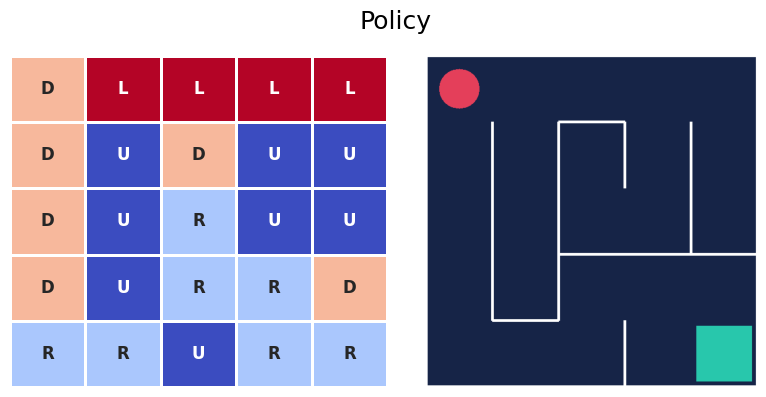

In [40]:
plot_policy(policy_probs, frame)

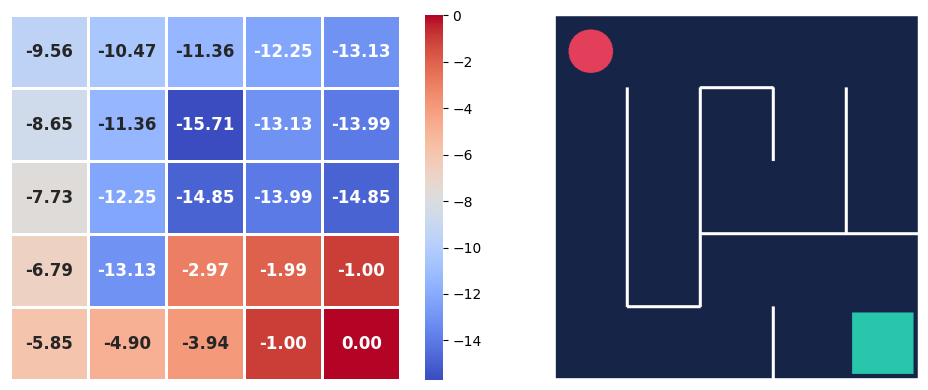

In [41]:
plot_values(state_values, frame)

# Find Values
# Policy Iteration

In [42]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for column in range(5):
                old_value = state_values[row, column]
                new_vales = 0
                
                action_probabilities = policy_probs[row, column]
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, column), action)
                    new_vales += prob * (reward + gamma * state_values[next_state])
                    
                state_values[row, column] = new_vales
                
                delta = max(delta, abs(old_value - new_vales))
            
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    
    for row in range(5):
        for column in range(5):
            old_action = policy_probs[row, column].argmax()
            
            new_action = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, column), action)
                qsa = reward + gamma * state_values[next_state]
                
                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action
                    
            action_probs = np.zeros(4)
            action_probs[new_action] = 1
            policy_probs[row, column] = action_probs
            
            if old_action != new_action:
                policy_stable = False
    return policy_stable

def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)
        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)
        

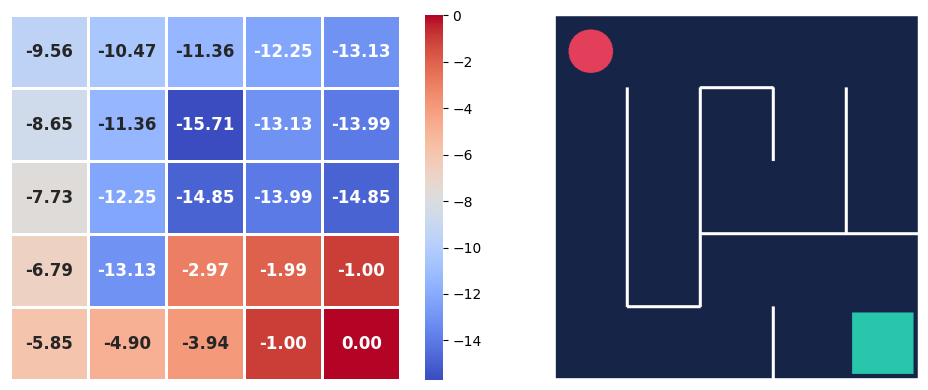

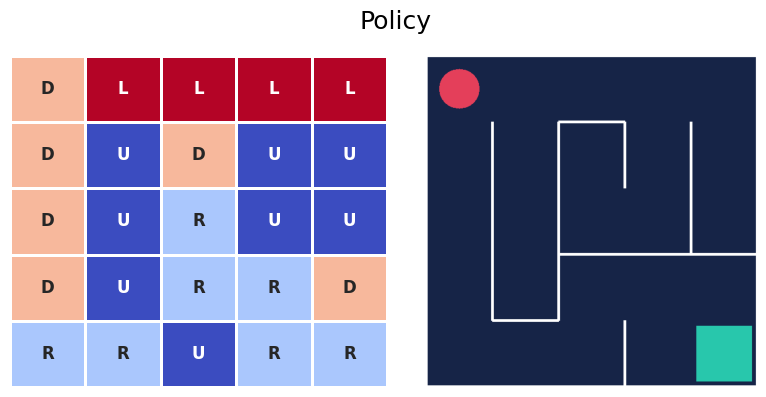

In [43]:
policy_iteration(policy_probs, state_values)

In [46]:
test_agent(env, policy)

RuntimeError: Requested MovieWriter (ffmpeg) not available